In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Cleaned_ZOMATO1.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [5]:
df=df[['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)']]
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xd987      KOCRES16DEL01                 21.0                      4.7   
1  0x2784     PUNERES13DEL03                 23.0                      4.7   
2  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
3  0xdb64      KNPRES14DEL02                 24.0                      4.7   
4  0x3af3      MUMRES15DEL03                 29.0                      4.5   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            10.003064             76.307589                   10.043064   
1            18.562450             73.916619                   18.652450   
2            30.899584             75.809346                   30.919584   
3            26.463504             80.372929                   26.593504   
4            19.176269             72.836721                   19.266269   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    76.347589  13-02-2022       14:55             15:05   
1                    74.006619  04-03-2022       17:30             17:40   
2                    75.829346  13-02-2022       09:20             09:30   
3                    80.502929  14-02-2022       19:50             20:05   
4                    72.926721  02-04-2022       20:25             20:35   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0             Stormy                 High                  1          Meal   
1         Sandstorms               Medium                  1        Drinks   
2         Sandstorms                  Low                  0        Buffet   
3                Fog                  Jam                  1         Snack   
4         Sandstorms                  Jam                  2        Buffet   

    Type_of_vehicle  multiple_deliveries Festival           City  \
0        motorcycle                  1.0       No  Metropolitian   
1           scooter                  1.0       No  Metropolitian   
2        motorcycle                  0.0       No  Metropolitian   
3           scooter                  1.0       No  Metropolitian   
4  electric_scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                23  
1                21  
2                20  
3                41  
4                20

In [6]:
df.shape

(33765, 20)

In [7]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [8]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

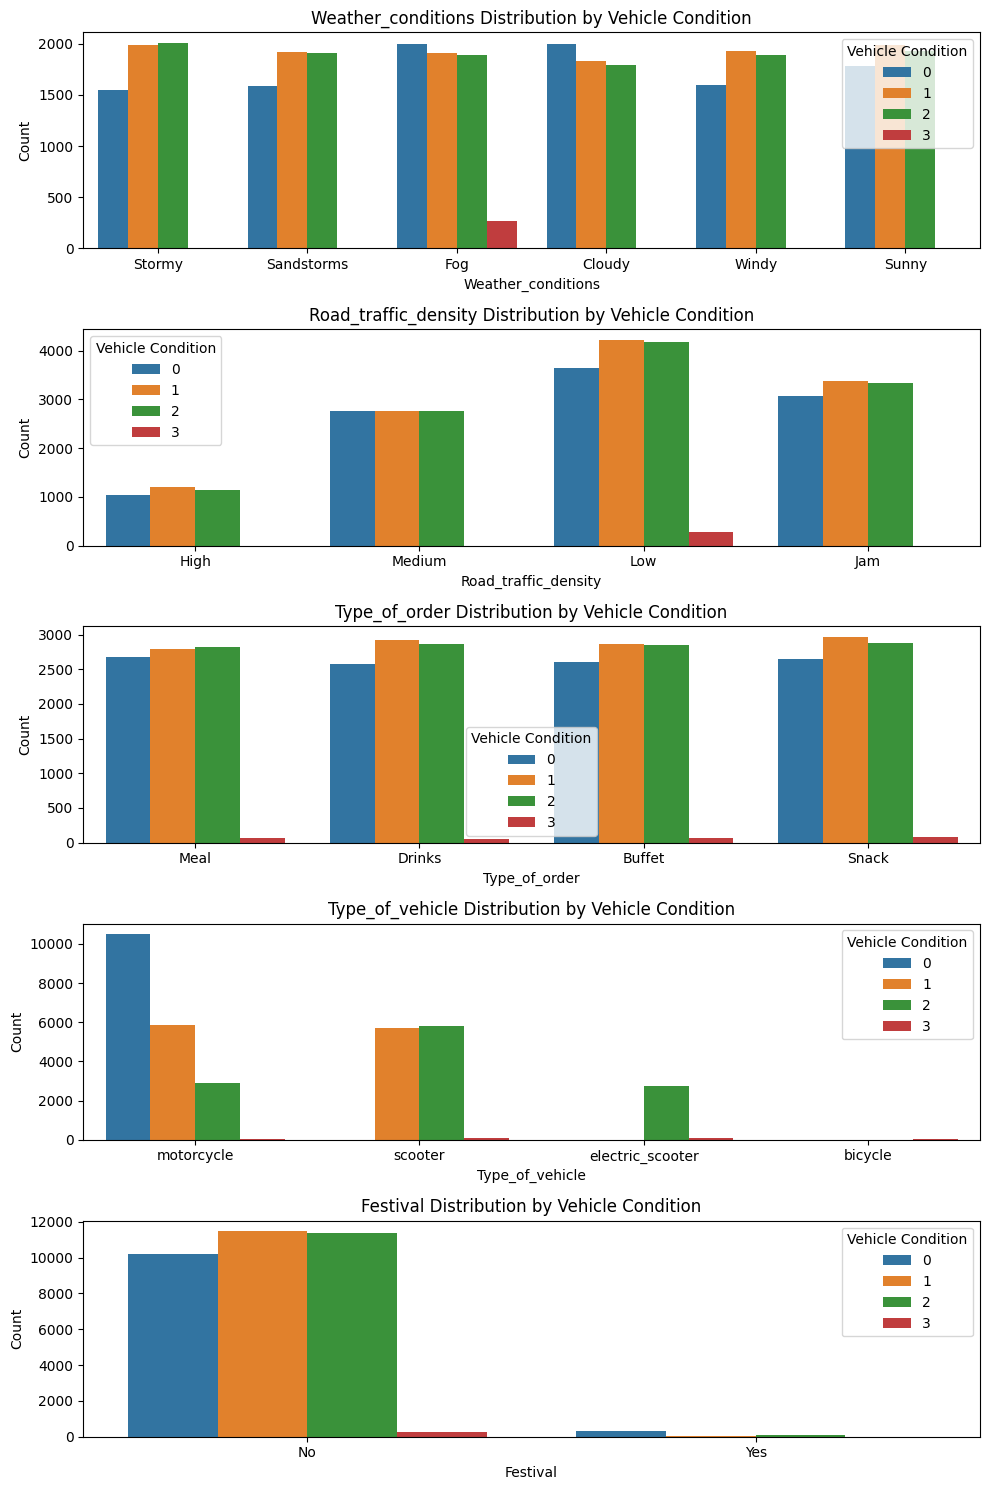

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the Zomato dataset

# Define categorical variables
categorical_vars = ['Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival']

# Create subplots
fig, axs = plt.subplots(len(categorical_vars), 1, figsize=(10, 15))

# Loop through each categorical variable
for i, var in enumerate(categorical_vars):
    # Plot using seaborn countplot
    sns.countplot(data=df, x=var, hue='Vehicle_condition', ax=axs[i])
    axs[i].set_title(f'{var.capitalize()} Distribution by Vehicle Condition')
    axs[i].set_xlabel(f'{var.capitalize()}')
    axs[i].set_ylabel('Count')
    axs[i].legend(title='Vehicle Condition')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

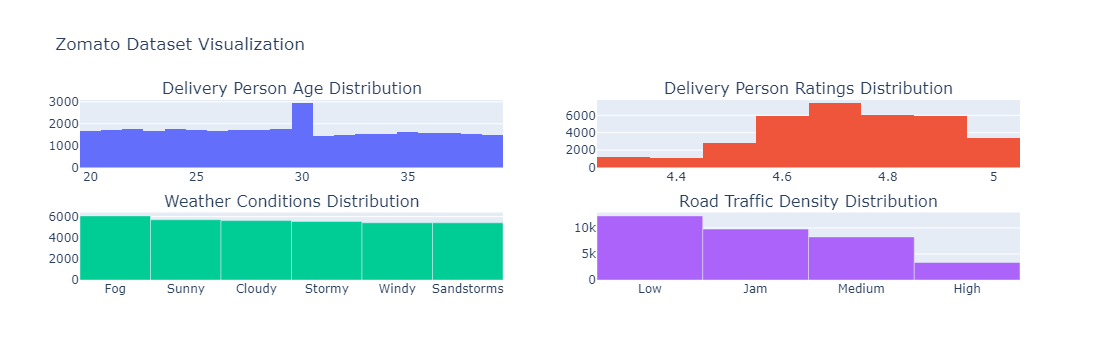

In [10]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df is your DataFrame containing the Zomato dataset

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Delivery Person Age Distribution", 
                                                    "Delivery Person Ratings Distribution", 
                                                    "Weather Conditions Distribution", 
                                                    "Road Traffic Density Distribution"))

# Delivery Person Age Distribution
fig.add_trace(go.Histogram(x=df['Delivery_person_Age'], name="Age"), row=1, col=1)

# Delivery Person Ratings Distribution
fig.add_trace(go.Histogram(x=df['Delivery_person_Ratings'], name="Ratings"), row=1, col=2)

# Weather Conditions Distribution
weather_counts = df['Weather_conditions'].value_counts()
fig.add_trace(go.Bar(x=weather_counts.index, y=weather_counts.values, name="Weather Conditions"), row=2, col=1)

# Road Traffic Density Distribution
traffic_counts = df['Road_traffic_density'].value_counts()
fig.add_trace(go.Bar(x=traffic_counts.index, y=traffic_counts.values, name="Traffic Density"), row=2, col=2)

# Update layout
fig.update_layout(title_text="Zomato Dataset Visualization", showlegend=False)

# Show plot
fig.show()

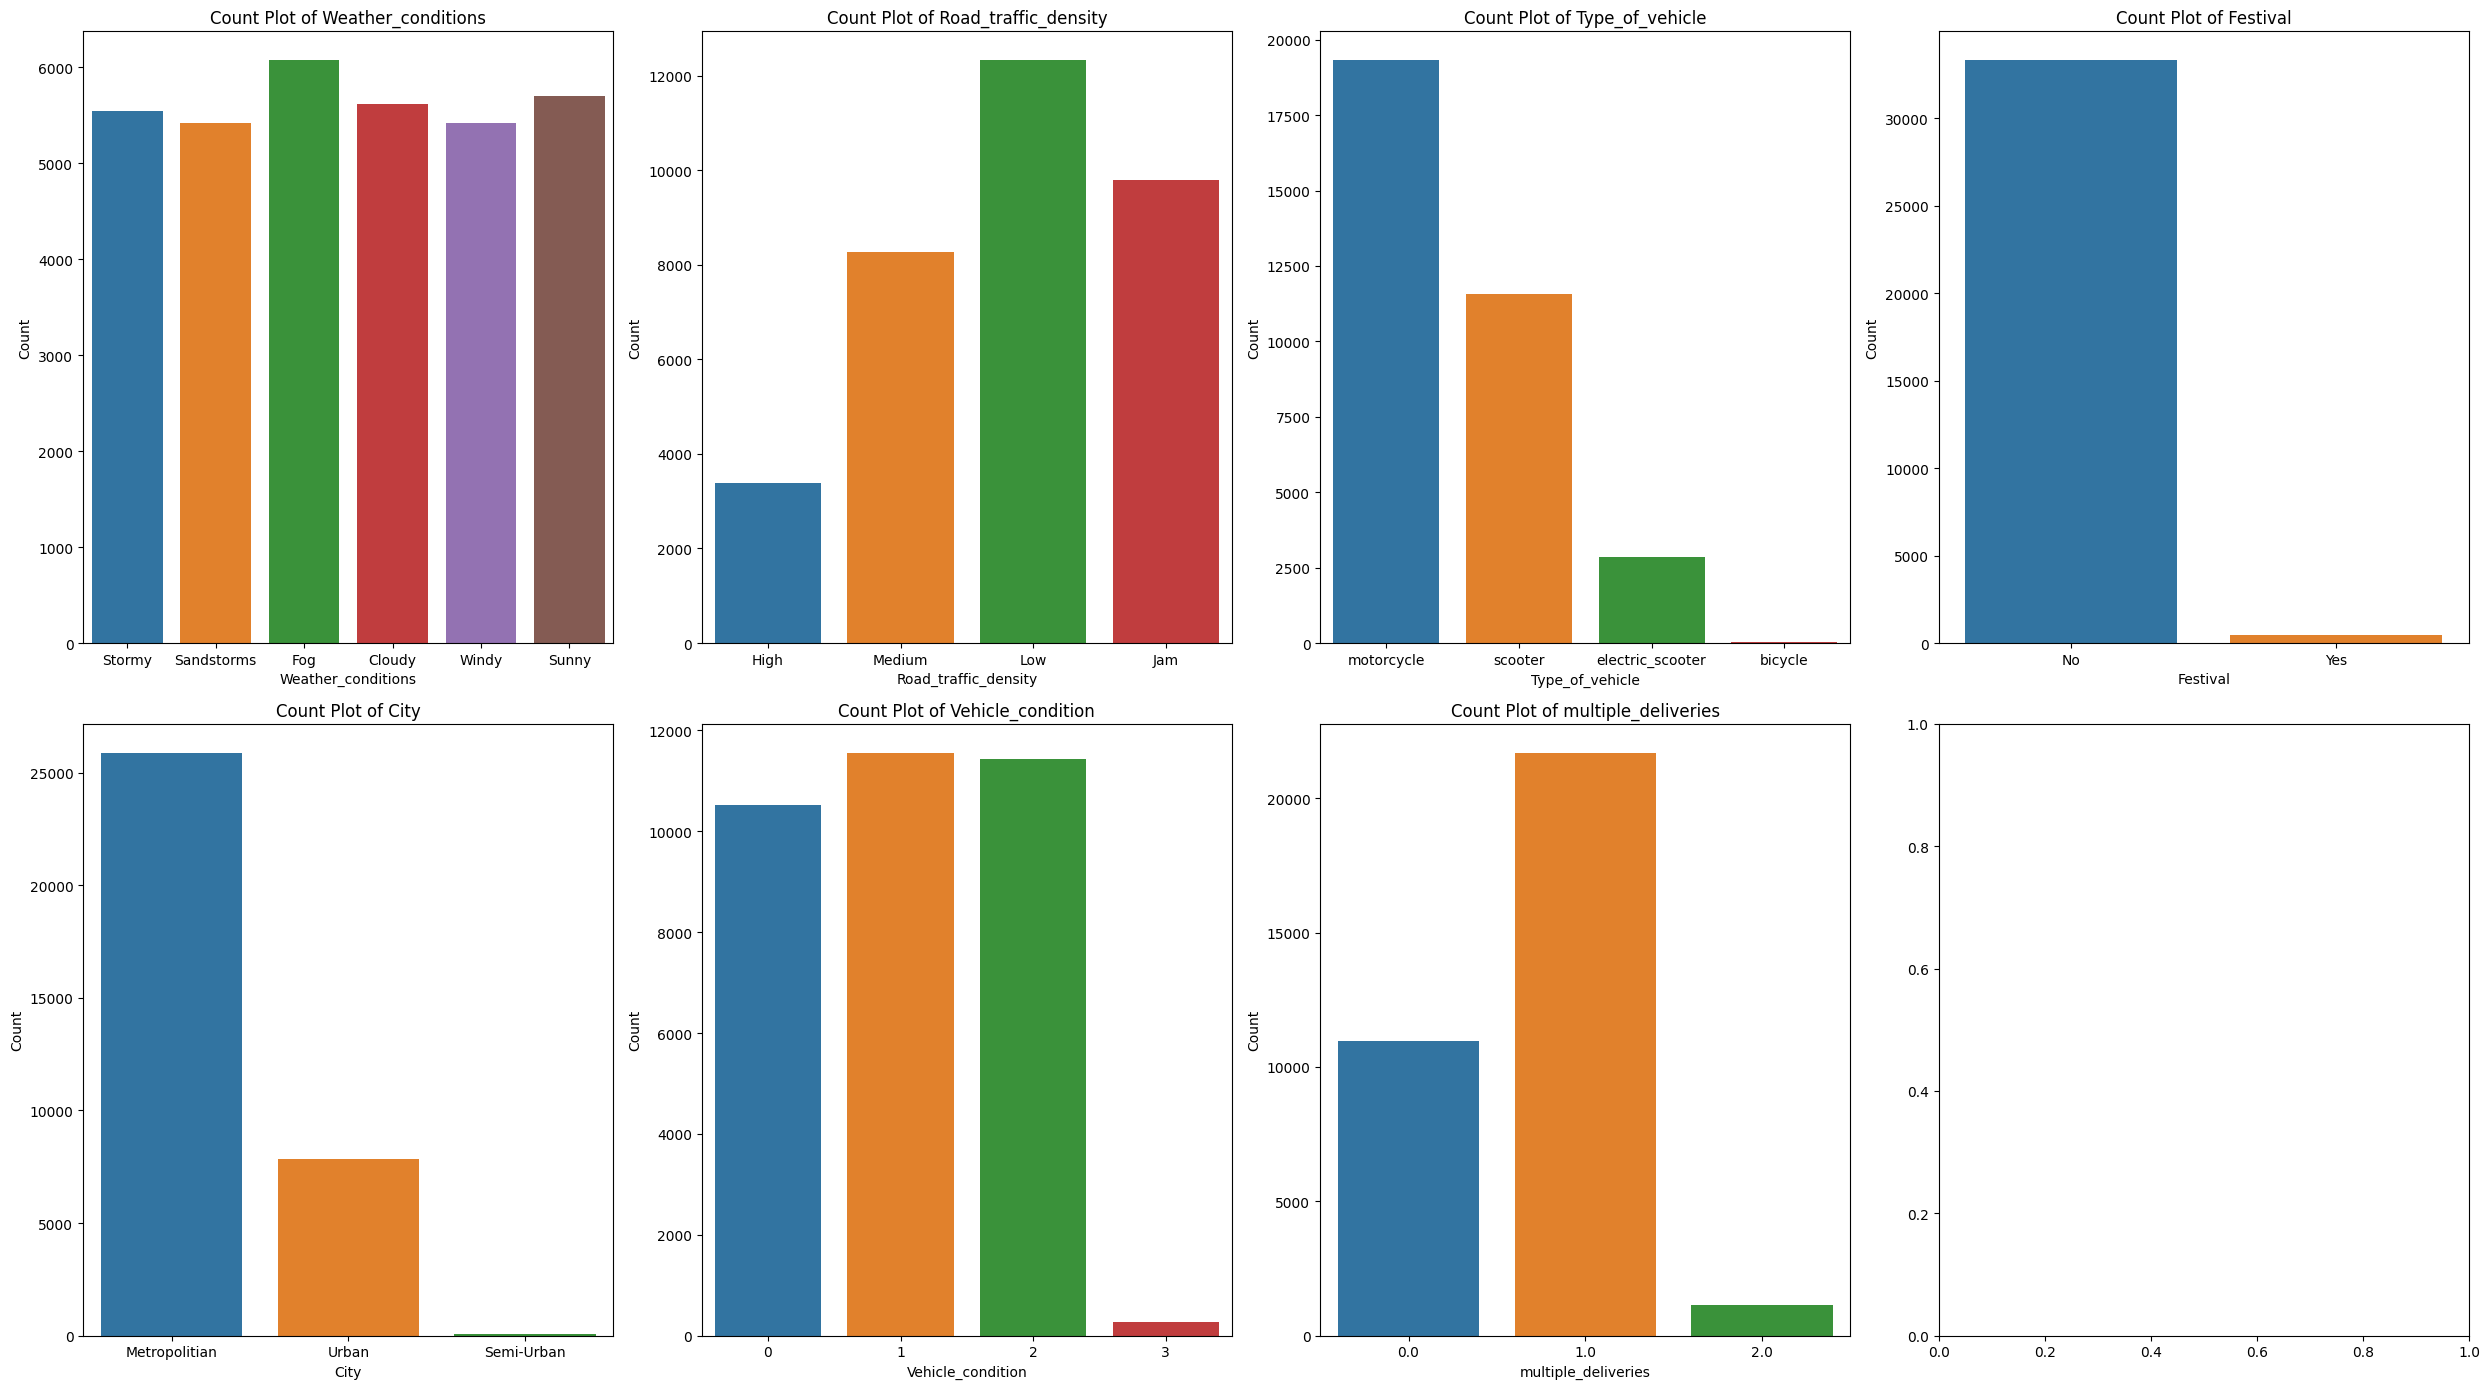

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
# and 'categorical_vars' is a list of categorical variables
categorical_vars =["Weather_conditions","Road_traffic_density","Type_of_vehicle",
                     "Festival","City","Vehicle_condition","multiple_deliveries"]


# Define the layout of subplots
num_plots = len(categorical_vars)
num_cols = 4  # Assuming 2 plots per row
num_rows = (num_plots + 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows*7))

# Flatten the axes array if needed
if num_rows == 1:
    axes = [axes]

# Iterate over categorical variables and create count plots
for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=var, data=df, ax=axes[row][col])
    axes[row][col].set_title(f'Count Plot of {var}')
    axes[row][col].set_xlabel(var)
    axes[row][col].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


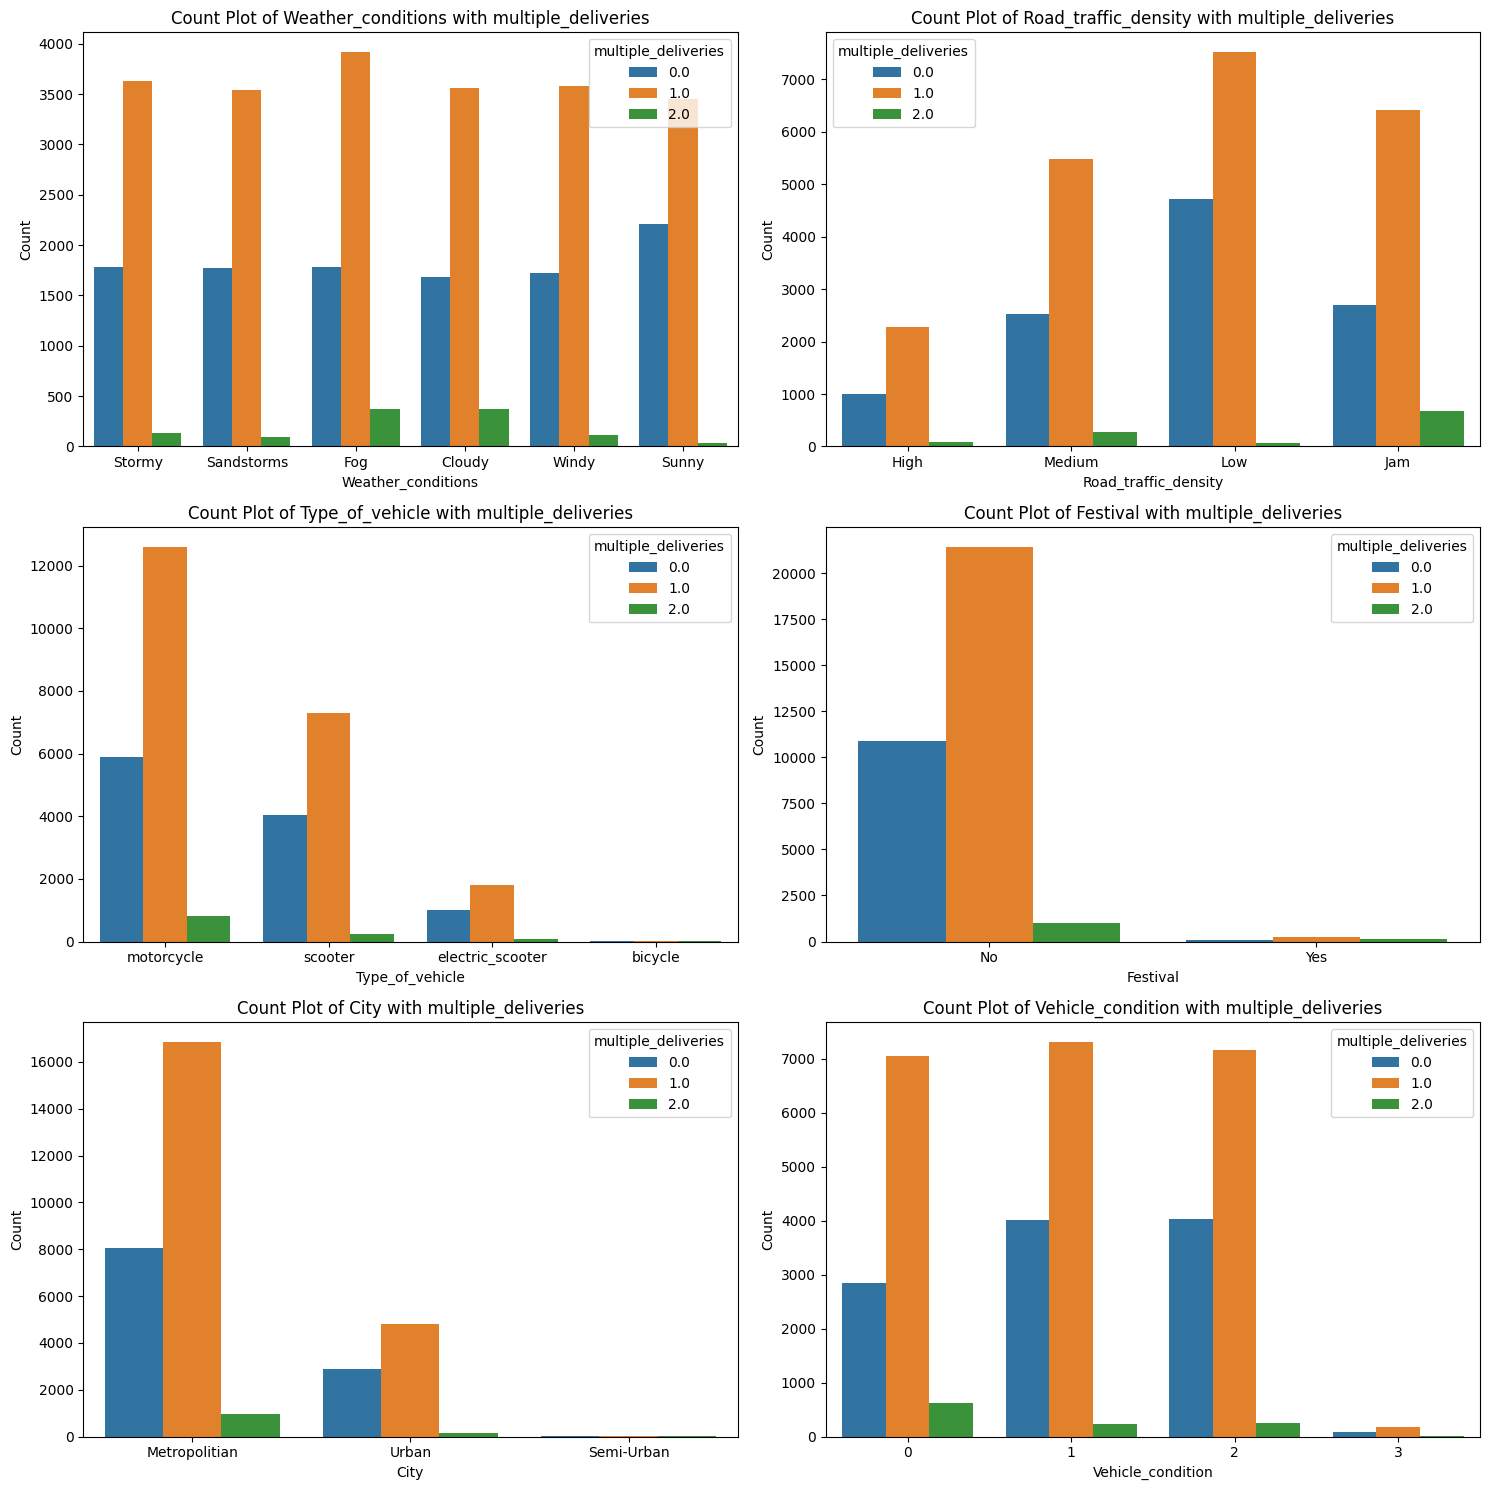

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
# and 'categorical_vars' is a list of categorical variables
categorical_vars =["Weather_conditions","Road_traffic_density","Type_of_vehicle",
                     "Festival","City","Vehicle_condition"]


hue_var = 'multiple_deliveries'  # Choose a categorical variable to use as hue

# Define the layout of subplots
num_plots = len(categorical_vars)
num_cols = 2  # Assuming 2 plots per row
num_rows = (num_plots + 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

# Flatten the axes array if needed
if num_rows == 1:
    axes = [axes]

# Iterate over categorical variables and create count plots
for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=var, hue=hue_var, data=df, ax=axes[row][col])
    axes[row][col].set_title(f'Count Plot of {var} with {hue_var}')
    axes[row][col].set_xlabel(var)
    axes[row][col].set_ylabel('Count')
    axes[row][col].legend(title=hue_var)  # Add legend

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

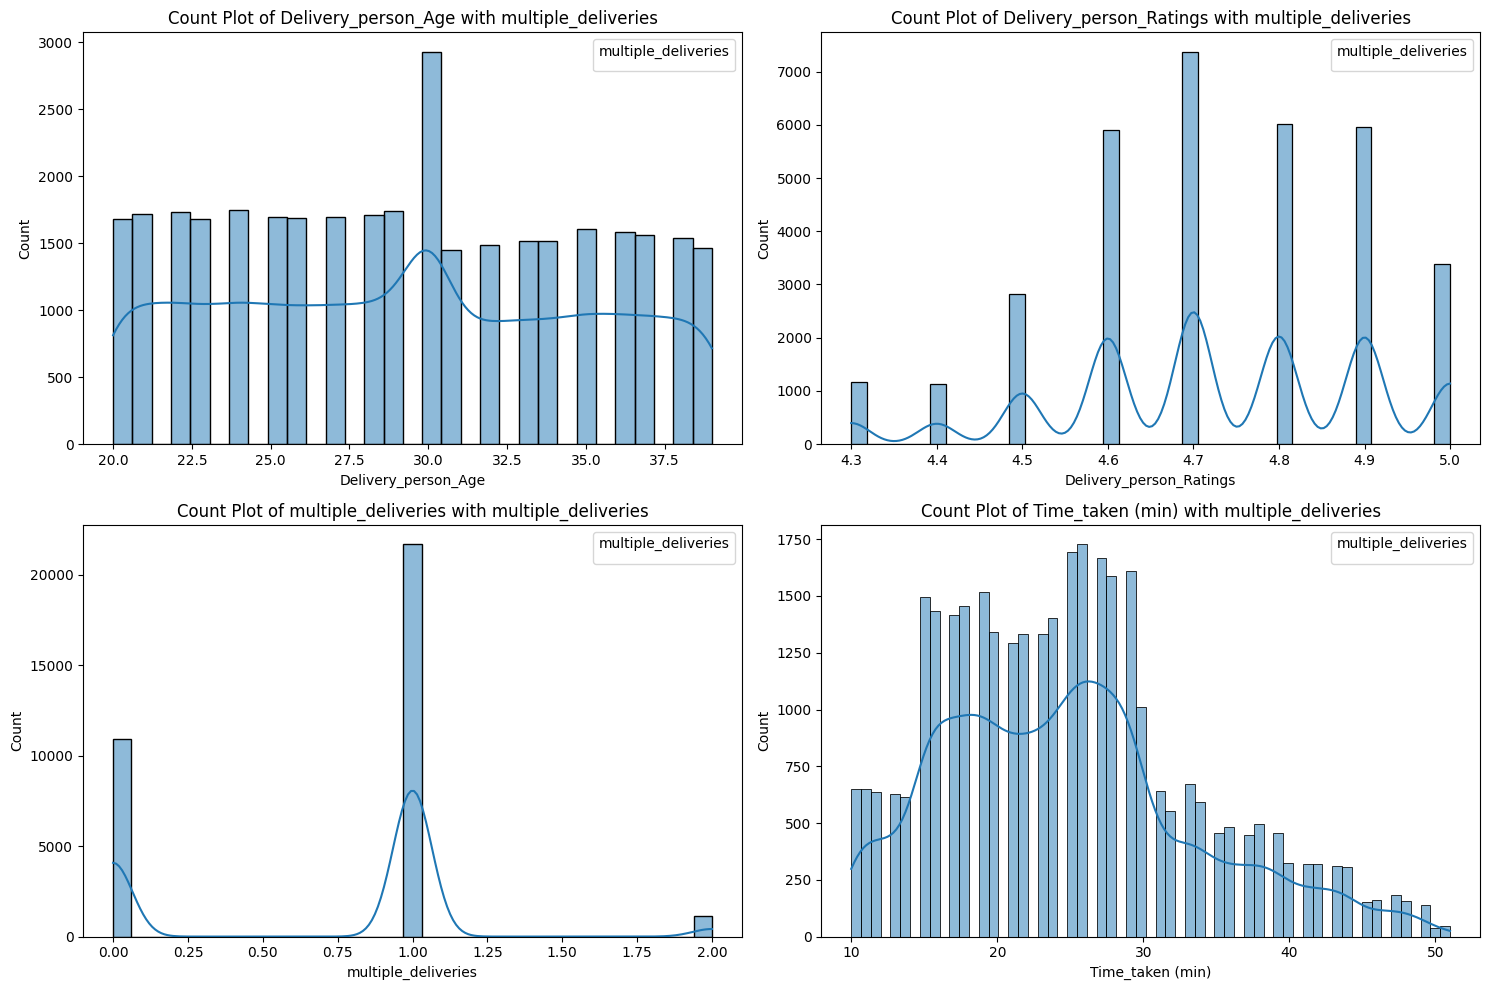

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame containing the dataset
# and 'categorical_vars' is a list of categorical variables
numerical_vars =["Delivery_person_Age","Delivery_person_Ratings","multiple_deliveries","Time_taken (min)"]
# Define the layout of subplots
num_plots = len(numerical_vars)
num_cols = 2  # Assuming 2 plots per row
num_rows = (num_plots + 1) // num_cols  # Calculate the number of rows needed
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
# Flatten the axes array if needed
if num_rows == 1:
    axes = [axes]
# Iterate over categorical variables and create count plots
for i, var in enumerate(numerical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(x=var, data=df, ax=axes[row][col],kde=True)
    axes[row][col].set_title(f'Count Plot of {var} with {hue_var}')
    axes[row][col].set_xlabel(var)
    axes[row][col].set_ylabel('Count')
    axes[row][col].legend(title=hue_var)  # Add legend
# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
df

ID Delivery_person_ID  Delivery_person_Age  \
0      0xd987      KOCRES16DEL01                 21.0   
1      0x2784     PUNERES13DEL03                 23.0   
2      0xc8b6     LUDHRES15DEL02                 34.0   
3      0xdb64      KNPRES14DEL02                 24.0   
4      0x3af3      MUMRES15DEL03                 29.0   
...       ...                ...                  ...   
33760  0xa333     CHENRES08DEL02                 37.0   
33761  0x4e21     BANGRES16DEL03                 28.0   
33762  0x7c09      JAPRES04DEL01                 30.0   
33763  0x4f8d     CHENRES08DEL03                 30.0   
33764  0x5eee    COIMBRES11DEL01                 20.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                          4.7            10.003064             76.307589   
1                          4.7            18.562450             73.916619   
2                          4.3            30.899584             75.809346   
3                          4.7            26.463504             80.372929   
4                          4.5            19.176269             72.836721   
...                        ...                  ...                   ...   
33760                      4.8            13.022394             80.242439   
33761                      4.9            13.029198             77.570997   
33762                      4.8            26.902328             75.794257   
33763                      4.9            13.022394             80.242439   
33764                      4.7            11.001753             76.986241   

       Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
0                       10.043064                    76.347589  13-02-2022   
1                       18.652450                    74.006619  04-03-2022   
2                       30.919584                    75.829346  13-02-2022   
3                       26.593504                    80.502929  14-02-2022   
4                       19.266269                    72.926721  02-04-2022   
...                           ...                          ...         ...   
33760                   13.042394                    80.262439  05-04-2022   
33761                   13.059198                    77.600997  30-03-2022   
33762                   26.912328                    75.804257  24-03-2022   
33763                   13.052394                    80.272439  11-03-2022   
33764                   11.041753                    77.026241  07-03-2022   

      Time_Orderd Time_Order_picked Weather_conditions Road_traffic_density  \
0           14:55             15:05             Stormy                 High   
1           17:30             17:40         Sandstorms               Medium   
2           09:20             09:30         Sandstorms                  Low   
3           19:50             20:05                Fog                  Jam   
4           20:25             20:35         Sandstorms                  Jam   
...           ...               ...                ...                  ...   
33760       09:35             09:50         Sandstorms                  Low   
33761       21:55       0.916666667         Sandstorms                  Jam   
33762       11:35             11:45              Windy                 High   
33763       23:50          24:05:00             Cloudy                  Low   
33764       13:35             13:40             Cloudy                 High   

       Vehicle_condition Type_of_order   Type_of_vehicle  multiple_deliveries  \
0                      1          Meal        motorcycle                  1.0   
1                      1        Drinks           scooter                  1.0   
2                      0        Buffet        motorcycle                  0.0   
3                      1         Snack           scooter                  1.0   
4                      2        Buffet  electric_scooter                  1.0   
...                  ...     